In [1]:
import edward as ed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from edward.models import Normal
from jupyterthemes import jtplot
jtplot.style('oceans16')

%matplotlib inline

C:\Users\ares\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [187]:
def build_toy_dataset(N, D, K, sigma=1):
    x_train = np.zeros((D, N))
#     z = np.random.normal(0.0, 1.0, size=(K, N))
    w = np.random.normal(0.0, 2.0, size=(D, K))
    x = np.matlib.repmat(np.linspace(-5, 5, N), K, 1)
    z = np.sin(0.5*x)
    mean = np.dot(w, z)
    x_train = mean + np.random.normal(mean, sigma)

    print(w)
    return x_train

img = np.mean(mpimg.imread('jigglypuff.jpg'), axis=2)

In [188]:
im_numel = len(img.flatten())
D = 2
# N = int(im_numel / D)
N = 5000
K = 1 # latent dimensionality

x_train = build_toy_dataset(N, D, K)
# x_train = np.reshape(img, (D, N))

[[-0.16367705]
 [-1.91073113]]


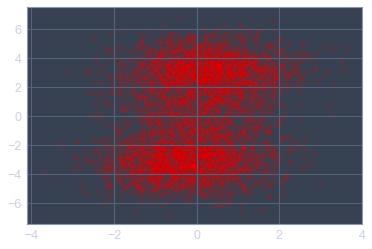

In [189]:
plt.scatter(x_train[0,:], x_train[1,:], color='red', alpha=0.1);

In [190]:
w = Normal(loc=tf.zeros([D, K]), scale=2.0*tf.ones([D, K]))
z = Normal(loc=tf.zeros([N, K]), scale=tf.ones([N, K]))
x = Normal(loc=tf.matmul(w, z, transpose_b=True), scale=tf.ones([D, N]))

In [191]:
qw = Normal(loc=tf.Variable(tf.random_normal([D, K])),
           scale=tf.nn.softplus(tf.Variable(tf.random_normal([D, K]))))

qz = Normal(loc=tf.Variable(tf.random_normal([N, K])),
           scale=tf.nn.softplus(tf.Variable(tf.random_normal([N, K]))))

In [192]:
inference = ed.KLqp({w:qw, z:qz}, data={x: x_train})

C:\Users\ares\Anaconda3\envs\py35\lib\site-packages\edward\util\random_variables.py:52: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \


In [193]:
inference.run(n_iter=2000, n_print=100, n_samples=10)

2000/2000 [100%] ██████████████████████████████ Elapsed: 29s | Loss: 19950.361


In [202]:
x_post = ed.copy(x, {w: qw, z: qz})
x_gen = sess.run(x_post)

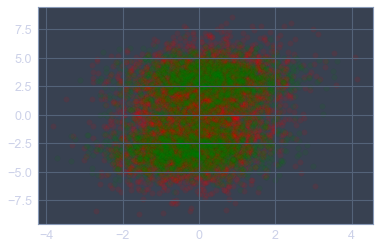

In [205]:
plt.scatter(x_gen[0,:], x_gen[1,:], color='red', alpha=0.1)
plt.scatter(x_train[0,:], x_train[1,:], color='green', alpha=0.1);

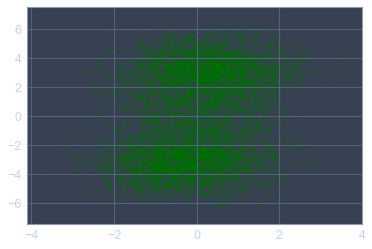

In [204]:
plt.scatter(x_train[0,:], x_train[1,:], color='green', alpha=0.1);